In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil
import dynamic


In [2]:
datapath = "data/Fig4/"
figpath = "figure/Fig4/"

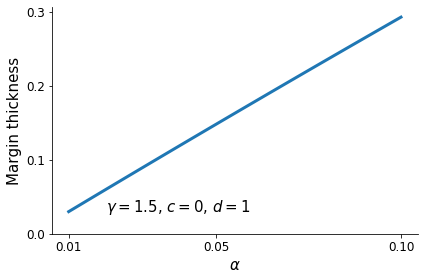

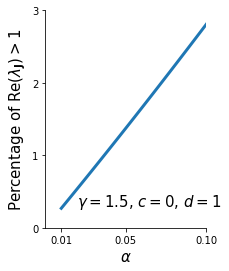

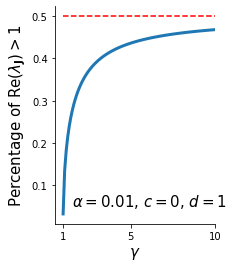

In [4]:
alphas = np.linspace(0.01,0.1,num=100)
gamma = 1.5
delta_r = gamma*np.sqrt(1+alphas)-gamma*(np.sqrt(1-alphas))**3
plt.plot(alphas,delta_r,linewidth=3)
plt.xticks([0.01,0.05,0.10],fontsize=12)
plt.yticks([0,0.1,0.2,0.3],fontsize=12)
plt.text(s=r"$\gamma=1.5$, $c=0$, $d=1$",x = 0.02,y = 0.03,fontsize=15)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("Margin thickness",fontsize=15)
plt.tight_layout()
plt.savefig(figpath+"retrieval5.pdf")
plt.show()

fraction1 = np.arccos(1/(gamma*np.sqrt(1+alphas)))/np.pi*alphas
gammas = np.linspace(1.00,10.0,num=100)
fraction2 = np.arccos(1/(gammas*np.sqrt(1+0.01)))/np.pi*0.01

plt.plot(alphas,fraction1*100,linewidth=3)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"Percentage of $\operatorname{Re}(\lambda_{\mathbf{J}})>1$",fontsize=15)
plt.xticks([0.01,0.05,0.10])
plt.yticks([0,1,2,3])
plt.xlim(0,0.1)
plt.text(s=r"$\gamma=1.5$, $c=0$, $d=1$",x = 0.02,y = 0.3,fontsize=15)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.045)
plt.savefig(figpath+"retrieval6.pdf")
plt.show()

plt.plot(gammas,100*fraction2,linewidth=3)
plt.plot(gammas,0.5*0.01*np.ones_like(gammas)*100,color="r",linestyle="--")
plt.xlabel(r"$\gamma$",fontsize=15)
plt.ylabel(r"Percentage of $\operatorname{Re}(\lambda_{\mathbf{J}})>1$",fontsize=15)
plt.text(s=r"$\alpha=0.01$, $c=0$, $d=1$",x = 1.5,y = 0.05,fontsize=15)
plt.xlim(0.5,10)
plt.xticks([1,5,10])
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(25)
plt.savefig(figpath+"retrieval7.pdf")
plt.show()

FAKE ALPHA = 0.01
FAKE ALPHA = 0.05
FAKE ALPHA = 0.01
FAKE ALPHA = 0.01


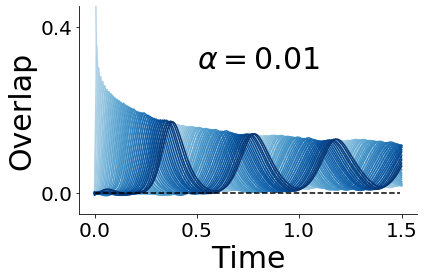

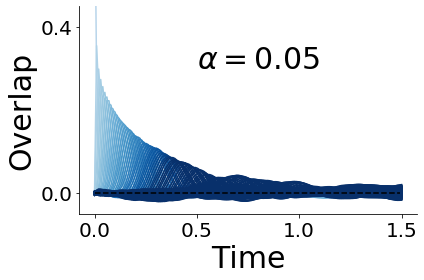

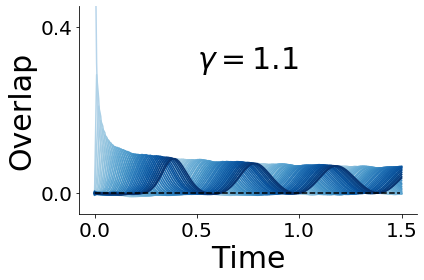

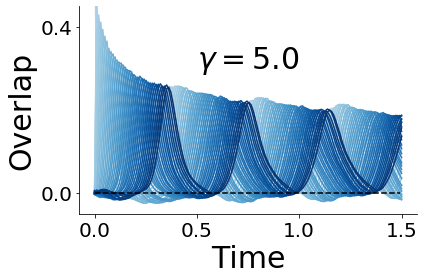

In [23]:
for kk,alpha in enumerate([0.01,0.05]):
    N = 4000
    c = 0
    gamma =1.5
    d = 1
    diluted = 1
    segment=1
    clean_diag=False
    gaussian=False
    print("FAKE ALPHA = "+str(alpha/(diluted)))
    if_circulant = True

    tau = 0.01
    phi = lambda x: np.tanh(x)
    all_overlap =[]
    if not os.path.exists(datapath+"overlap1_{}.csv".format(kk)):
        for i in range(30):
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            mymodel.simulate(1.5,mymodel.pattern[0],dt=0.01)
            overlap_activation = mymodel.overlap_activation()
            all_overlap.append(overlap_activation)
    #     shutil.copyfile("../data/connectivity_dynamic/overalp_{}.csv".format(kk),datapath+"overlap_{}.csv".format(kk))
        np.savetxt(datapath+"overlap1_{}.csv".format(kk),np.average(np.array(all_overlap),axis=0))

for kk,gamma in enumerate([1.1,5.0]):
    N = 4000
    c = 0
    alpha = 0.01
    d = 1
    diluted = 1
    segment=1
    clean_diag=False
    gaussian=False
    print("FAKE ALPHA = "+str(alpha/(diluted)))
    if_circulant = True

    tau = 0.01
    phi = lambda x: np.tanh(x)
    all_overlap =[]
    if not os.path.exists(datapath+"overlap2_{}.csv".format(kk)):
        for i in range(30):
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            mymodel.simulate(1.5,mymodel.pattern[0],dt=0.01)
            overlap_activation = mymodel.overlap_activation()
            all_overlap.append(overlap_activation)
    #     shutil.copyfile("../data/connectivity_dynamic/overalp2_{}.csv".format(kk),datapath+"overlap_{}.csv".format(kk))
        np.savetxt(datapath+"overlap2_{}.csv".format(kk),np.average(np.array(all_overlap),axis=0))
        
color = plt.get_cmap("Blues")
file1 = "overlap1_0.csv"
file2 = "overlap1_1.csv"
file3 = "overlap2_0.csv"
file4 = "overlap2_1.csv"
files = [file1,file2,file3,file4]
# ss = [[r"$\alpha=0.01$"],[r"$\alpha=0.05$"],[r"$\gamma=1.1$"],[r"$\gamma=5.0$"]]
for aa,file in enumerate(files):
    plt.clf()
    t = np.linspace(0,1.5,num=150,endpoint=True)
    overlap_activation = np.loadtxt(datapath+file)
    num=40
    peak = []
    for i in range(len(overlap_activation)):
        plt.plot(t,overlap_activation[i],color=color(0.3+i*0.7/num))
        peak.append(max(overlap_activation[i]))
    # plt.ylim(-0.03,0.4)
    plt.plot(mymodel.t,np.zeros_like(mymodel.t),linestyle="--",color="k")
    plt.ylim(-0.05,0.45)
    plt.xlabel("Time",fontsize=30)
    plt.ylabel("Overlap",fontsize=30)
    plt.xticks([0.0,0.5,1.0,1.5],fontsize=20)
    plt.yticks([0.0,0.4],fontsize=20)
    ax =plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    if aa==0:
        plt.text(s=r"$\alpha=0.01$",x=0.5,y=0.3,fontsize=30)
    if aa==1:
        plt.text(s=r"$\alpha=0.05$",x=0.5,y=0.3,fontsize=30)
    if aa==2:
        plt.text(s=r"$\gamma=1.1$",x=0.5,y=0.3,fontsize=30)
    if aa==3:
        plt.text(s=r"$\gamma=5.0$",x=0.5,y=0.3,fontsize=30)
    plt.tight_layout()
    plt.savefig(figpath+"retrieval{}.pdf".format(aa+1))
    plt.show()

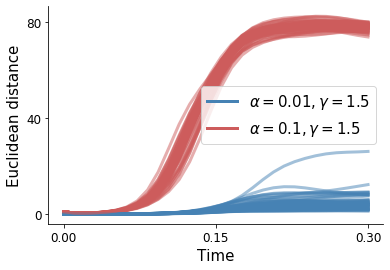

In [10]:
N = 4000
alpha=0.1
c = 0
gamma =1.5
d = 1
diluted = 1
segment=1
clean_diag=False
gaussian=False
if_circulant = True

if not os.path.exists(datapath+"trajectory12b.csv"):
    tau = 0.01
    phi = lambda x: np.tanh(x)
    all_overlap =[]
    para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
    mymodel = dynamic.rnn(para)
    # eigval, eigvec = np.linalg.eig(mymodel.J)
    all_a12b = []
    all_a1b = []
    all_a2b = []
    for i in range(50):
        print(i)
        state1 = 0.01*np.random.randn(N)
    #     state1 = 1*direction
        state2 = state1+0.001*np.random.randn(N)
        mymodel.simulate(0.3,state1,dt=0.01)
        a1 = mymodel.state
        mymodel.simulate(0.3,state2,dt=0.01)
        a2 = mymodel.state
        all_a12b.append(np.sqrt(np.sum((a1-a2)**2,axis=0)))
        all_a1b.append(np.sqrt(np.sum((a1)**2,axis=0)))
        all_a2b.append(np.sqrt(np.sum((a2)**2,axis=0)))
    np.savetxt(datapath+"trajectory12b.csv",np.array(all_a12b))
#     np.savetxt("data/connectivity_dynamic/trajectory1b.csv",np.array(all_a1b))
#     np.savetxt("data/connectivity_dynamic/trajectory2b.csv",np.array(all_a2b))
    
N = 4000
alpha=0.01
c = 0
gamma =1.5
d = 1
diluted = 1
segment=1
clean_diag=False
gaussian=False
if_circulant = True

if not os.path.exists(datapath+"trajectory12a.csv"):
    tau = 0.01
    phi = lambda x: np.tanh(x)
    all_overlap =[]
    para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
    mymodel = dynamic.rnn(para)
    # eigval, eigvec = np.linalg.eig(mymodel.J)
    all_a12a = []
    all_a1a = []
    all_a2a = []
    for i in range(50):
        print(i)
        state1 = 0.01*np.random.randn(N)
    #     state1 = 1*direction
        state2 = state1+0.001*np.random.randn(N)
        mymodel.simulate(0.3,state1,dt=0.01)
        a1 = mymodel.state
        mymodel.simulate(0.3,state2,dt=0.01)
        a2 = mymodel.state
        all_a12a.append(np.sqrt(np.sum((a1-a2)**2,axis=0)))
        all_a1a.append(np.sqrt(np.sum((a1)**2,axis=0)))
        all_a2a.append(np.sqrt(np.sum((a2)**2,axis=0)))
    np.savetxt(datapath+"trajectory12a.csv",np.array(all_a12a))
#     np.savetxt("data/connectivity_dynamic/trajectory1b.csv",np.array(all_a1b))
#     np.savetxt("data/connectivity_dynamic/trajectory2b.csv",np.array(all_a2b)) 

all_a12a = np.loadtxt(datapath+"trajectory12a.csv")
all_a12b = np.loadtxt(datapath+"trajectory12b.csv")
tt = np.linspace(0,0.3,num=30)
for i in range(50):
    if i==0:
        plt.plot(tt,all_a12a[i],color="steelblue",linewidth=3,alpha=1,label=r"$\alpha=0.01,\gamma=1.5$")
        plt.plot(tt,all_a12b[i],color="indianred",linewidth=3,alpha=1,label=r"$\alpha=0.1,\gamma=1.5$")
    else:
        plt.plot(tt,all_a12a[i],color="steelblue",linewidth=3,alpha=0.5)
        plt.plot(tt,all_a12b[i],color="indianred",linewidth=3,alpha=0.5)
plt.legend(fontsize=15)
plt.xlabel(r"Time",fontsize=15)
plt.ylabel("Euclidean distance",fontsize=15)
plt.yticks([0,40,80],fontsize=12)
plt.xticks([0.0,0.15,0.3],fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.savefig(figpath+"retrieval10.pdf")